<a href="https://colab.research.google.com/github/sbbwoy/BDA/blob/main/%EB%B9%85%EB%B6%84%EB%B0%A9_3_22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##2. simple linear regression(SLR)

RMSE를 최소화하는 것이 잘 추정하는 것

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn import datasets

sns.set_theme(color_codes=True) #배경을 회색으로 

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/sudarshan-koirala/Salary-Prediciton-based-on-Years-of-Experience/master/Salary_Data.csv")
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [ ]:
df.shape

(30, 2)

In [ ]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


###data preprocessing

model에 데이터를 fitting하기 위해 전처리 과정 필요.

In [ ]:
X = df.iloc[:, :-1].values
y = df.iloc[:, 1].values

###model fitting

In [ ]:
#model fitting
lr = LinearRegression()
lr.fit(X, y)

LinearRegression()

In [ ]:
#result
print('intercept: {}'.format(lr.intercept_))
print('slope: {}'.format(lr.coef_[0]))

intercept: 25792.200198668696
slope: 9449.962321455076


###Test model

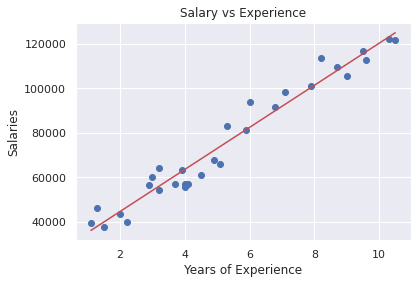

In [ ]:
plt.scatter(X, y, color = 'b')
plt.plot(X, lr.predict(X), color='r')

plt.title('Salary vs. Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Salaries')
plt.show()

In [ ]:
#plotting the obsered and fitted value

plt.scatter(, lr.predict(X), color='b')
plt.plot(y, y, color='r', label='y=x')
plt.xlabel('observed Y')
plt.ylabel('fitted Y')
plt.legend()
plt.show()

ValueError: ignored

**결정계수 = 전체 변동량 중 모형이 설명하는 변동량**

In [ ]:
help(LinearRegression.score)

Help on function score in module sklearn.base:

score(self, X, y, sample_weight=None)
    Return the coefficient of determination of the prediction.
    
    The coefficient of determination :math:`R^2` is defined as
    :math:`(1 - \frac{u}{v})`, where :math:`u` is the residual
    sum of squares ``((y_true - y_pred)** 2).sum()`` and :math:`v`
    is the total sum of squares ``((y_true - y_true.mean()) ** 2).sum()``.
    The best possible score is 1.0 and it can be negative (because the
    model can be arbitrarily worse). A constant model that always predicts
    the expected value of `y`, disregarding the input features, would get
    a :math:`R^2` score of 0.0.
    
    Parameters
    ----------
    X : array-like of shape (n_samples, n_features)
        Test samples. For some estimators this may be a precomputed
        kernel matrix or a list of generic objects instead with shape
        ``(n_samples, n_samples_fitted)``, where ``n_samples_fitted``
        is the number of sample

In [ ]:
round(lr.score(X, y), 3)

0.957

##cf. 모델 평가

* RMSE(Root mean Square Error, 평균 제곱근 오차)

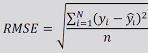

* R^2 (R-squared, 결정계수)

0 < R^2 < 1. 모델 데이터의 변동량을 측정한다. 

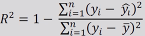


In [ ]:
import statsmodels.api as sm

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Tue, 22 Mar 2022   Prob (F-statistic):           1.14e-20
Time:                        07:07:18   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.579e+04   2273.053     11.347      0.0

In [ ]:
#extract coefficient
print('model parametes: {}'.format(model.params))
#R-square
print('R-squred: {}'.format(model.rsquared))
#t-value
print('t-values: {}'.format(model.tvalues))

model parametes: [25792.20019867  9449.96232146]
R-squred: 0.9569566641435086
t-values: [11.34693968 24.95009424]


##3. multiple linear regressin(MLR)

In [ ]:
diabetes = datasets.load_diabetes()
diabetes.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

In [ ]:
df = pd.DataFrame(diabetes['data'], columns = diabetes['feature_names'])
df['diabetes_score'] = diabetes['target']
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,diabetes_score
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


In [ ]:
print('target: diabetes_score(당뇨병 수치)')
for i, feature_name in enumerate(diabetes.feature_names):
    print(f'feature{i+1}: {feature_name}')

target: diabetes_score(당뇨병 수치)
feature1: age
feature2: sex
feature3: bmi
feature4: bp
feature5: s1
feature6: s2
feature7: s3
feature8: s4
feature9: s5
feature10: s6


In [ ]:
df.corr().tail()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,diabetes_score
s3,-0.075181,-0.379090,-0.366811,-0.178761,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697,-0.394789
s4,0.203841,0.332115,0.413807,0.257653,0.542207,0.659817,-0.738493,1.000000,0.617857,0.417212,0.430453
s5,0.270777,0.149918,0.446159,0.393478,0.515501,0.318353,-0.398577,0.617857,1.000000,0.464670,0.565883
s6,0.301731,0.208133,0.388680,0.390429,0.325717,0.290600,-0.273697,0.417212,0.464670,1.000000,0.382483
diabetes_score,0.187889,0.043062,0.586450,0.441484,0.212022,0.174054,-0.394789,0.430453,0.565883,0.382483,1.000000


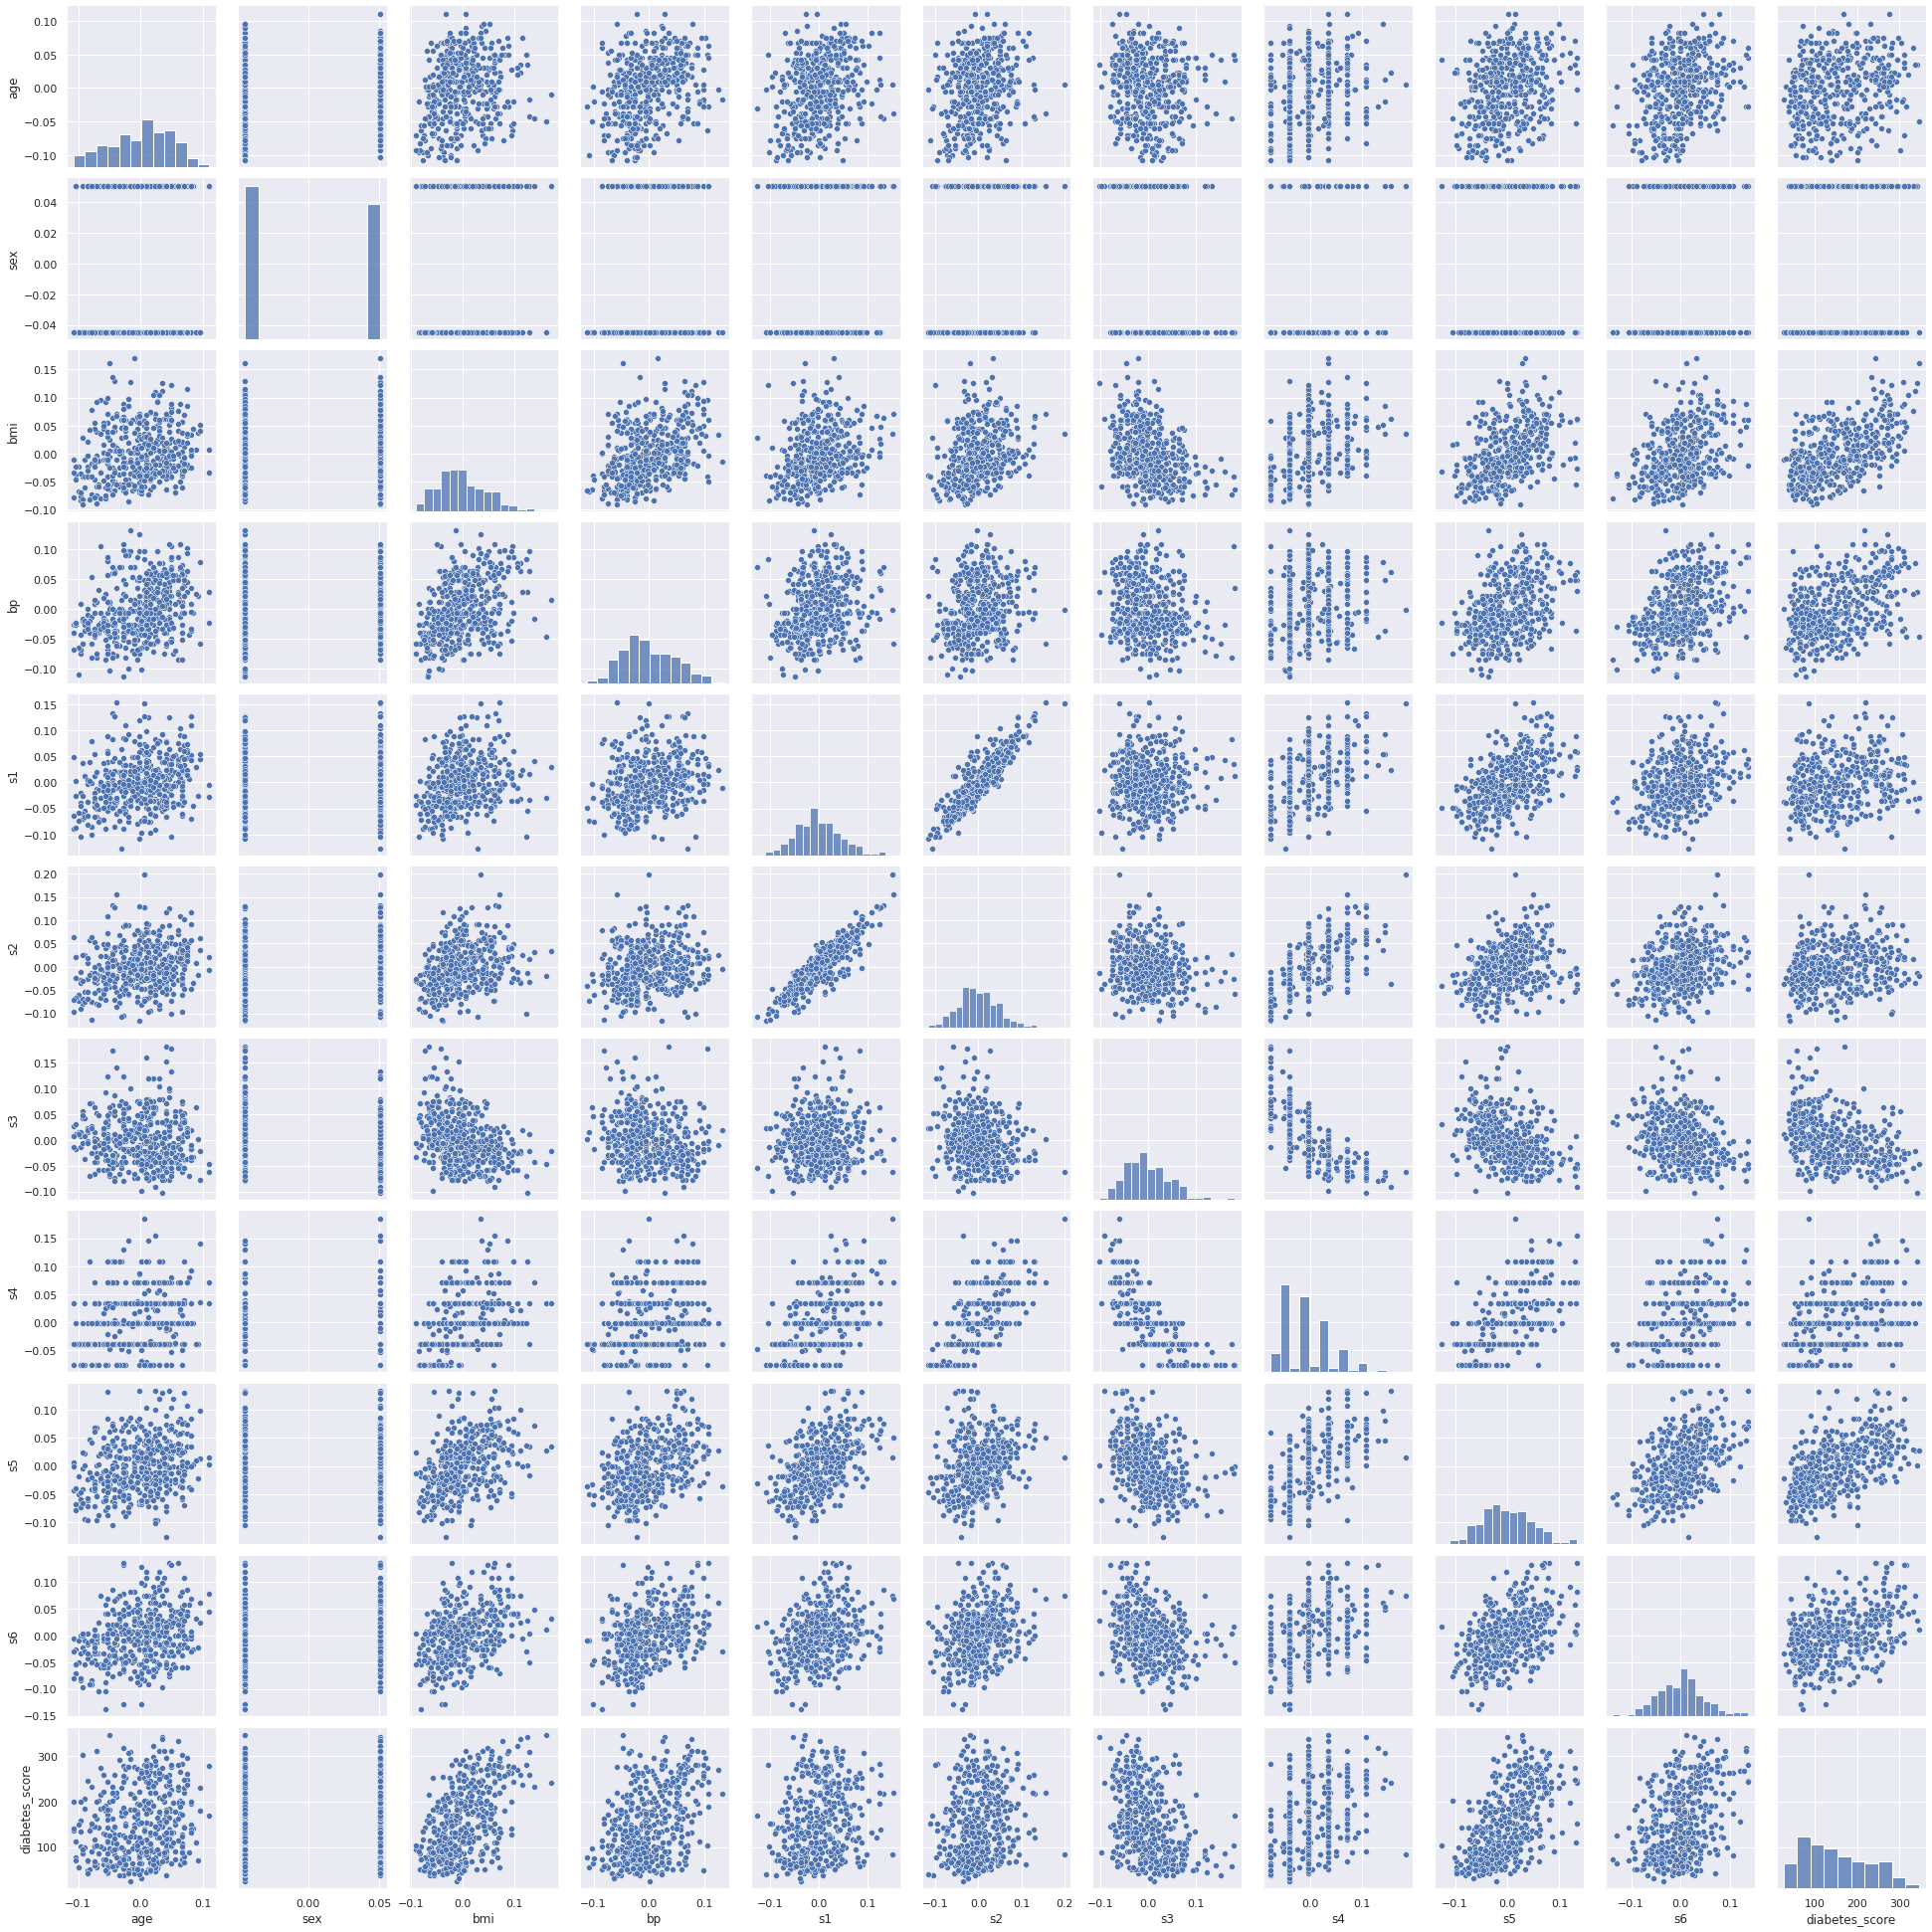

In [ ]:
sns.pairplot(df)
plt.show()

* sex는 categorical variable임
* s1과 s2 사이에는 강한 선형성을 관찰

* 상관관계는 두 변수 간에 얼마나 선형적인지...

In [ ]:
X = df[['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']]
y = df[['diabetes_score']]

In [ ]:
lr = LinearRegression()
lr.fit(X, y)

LinearRegression()

In [ ]:
print(f'intercept: {lr.intercept_}')
for i, feature_name in enumerate(diabetes.feature_names):
    print(f'{feature_name} coef: {lr.coef_[0, i]}')

intercept: [152.13348416]
age coef: -10.01219781747065
sex coef: -239.81908936565608
bmi coef: 519.8397867901341
bp coef: 324.3904276893763
s1 coef: -792.1841616283054
s2 coef: 476.74583782366267
s3 coef: 101.04457032134462
s4 coef: 177.06417623225033
s5 coef: 751.2793210873947
s6 coef: 67.62538639104375


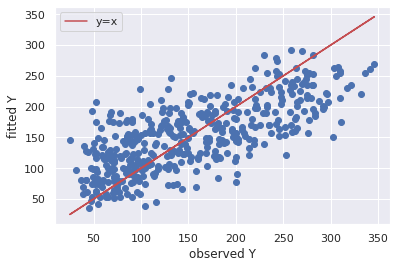

In [ ]:
plt.scatter(y, lr.predict(X), color='b')
plt.plot(y, y, color='r', label = 'y=x')
plt.xlabel('observed Y')
plt.ylabel('fitted Y')
plt.legend()
plt.show()

In [ ]:
round(lr.score(X, y), 3)

0.518

In [ ]:
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:         diabetes_score   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     46.27
Date:                Tue, 22 Mar 2022   Prob (F-statistic):           3.83e-62
Time:                        07:43:13   Log-Likelihood:                -2386.0
No. Observations:                 442   AIC:                             4794.
Df Residuals:                     431   BIC:                             4839.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        152.1335      2.576     59.061      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
#extract coefficient
print('model parametes: {}'.format(model.params))
#R-square
print('R-squred: {}'.format(model.rsquared))
#t-value
print('t-values: {}'.format(model.tvalues))

model parametes: const    152.133484
age      -10.012198
sex     -239.819089
bmi      519.839787
bp       324.390428
s1      -792.184162
s2       476.745838
s3       101.044570
s4       177.064176
s5       751.279321
s6        67.625386
dtype: float64
R-squred: 0.5177494254132934
t-values: const    59.061427
age      -0.167570
sex      -3.917184
bmi       7.813196
bp        4.958435
s1       -1.901163
s2        1.406187
s3        0.475431
s4        1.096538
s5        4.370394
s6        1.024872
dtype: float64
